### Youtube tutorial: https://www.youtube.com/watch?v=gtjxAH8uaP0 
### dataset github link: https://github.com/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

In [2]:
path = './data/pokemon/pokemon.csv'

df = pd.read_csv(path)

df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

### Explore dataset shape and values
- Select columns that have more than 1 missing value
- drop some columns that are not important (just to keep this DS simple)

In [4]:
print(df.columns)

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')


In [5]:
to_drop_columns = [
     'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'experience_growth', 
       'base_egg_steps', 'base_happiness', 'capture_rate', 'experience_growth', 'height_m',
       'japanese_name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense',
       'weight_kg'
    ]

df.drop(to_drop_columns, axis=1, inplace=True)


In [6]:
df.head()

,abilities,attack,base_total,classfication,defense,hp,name,speed,type1,type2,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",49,318,Seed Pokémon,49,45,Bulbasaur,45,grass,poison,1,0
1,"['Overgrow', 'Chlorophyll']",62,405,Seed Pokémon,63,60,Ivysaur,60,grass,poison,1,0
2,"['Overgrow', 'Chlorophyll']",100,625,Seed Pokémon,123,80,Venusaur,80,grass,poison,1,0
3,"['Blaze', 'Solar Power']",52,309,Lizard Pokémon,43,39,Charmander,65,fire,NaN,1,0
4,"['Blaze', 'Solar Power']",64,405,Flame Pokémon,58,58,Charmeleon,80,fire,NaN,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abilities      801 non-null    object
 1   attack         801 non-null    int64 
 2   base_total     801 non-null    int64 
 3   classfication  801 non-null    object
 4   defense        801 non-null    int64 
 5   hp             801 non-null    int64 
 6   name           801 non-null    object
 7   speed          801 non-null    int64 
 8   type1          801 non-null    object
 9   type2          417 non-null    object
 10  generation     801 non-null    int64 
 11  is_legendary   801 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 75.2+ KB


In [66]:
print('List columns that has more than 1 NA value')
print(df.columns[df.isna().sum() > 1])
print()
print('Values count of abilities columns')
abilities = set()

for a in df['abilities'].unique():
    s = a.replace('\'', '"')
    arr = json.loads(s)

    for item in arr:
        abilities.add(item)
print(list(abilities)[:10])

print()
print("Classification values ", len(df['classfication'].unique()))
print(df['classfication'].unique()[:10])

print()
print('type 1 values ' , len(df['type1'].unique()))
print(df['type1'].unique()[:10])

print()
print('type 2 values ' , len(df['type2'].unique()))
print(df['type2'].unique()[:10])


print()
print('Generation values ', len(df['generation'].unique()))
print(df['generation'].unique())


List columns that has more than 1 NA value
Index(['type2'], dtype='object')

Values count of abilities columns
['Technician', 'Bad Dreams', 'Disguise', 'Merciless', 'Unaware', 'Cursed Body', 'Sand Force', 'Fairy Aura', 'Rock Head', 'Sweet Veil']

Classification values  588
['Seed Pokémon' 'Lizard Pokémon' 'Flame Pokémon' 'Tiny Turtle Pokémon'
 'Turtle Pokémon' 'Shellfish Pokémon' 'Worm Pokémon' 'Cocoon Pokémon'
 'Butterfly Pokémon' 'Hairy Pokémon']

type 1 values  18
['grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric' 'ground'
 'fairy' 'fighting']

type 2 values  19
['poison' nan 'flying' 'dark' 'electric' 'ice' 'ground' 'fairy' 'grass'
 'fighting']

Generation values  7
[1 2 3 4 5 6 7]


### Visualizing

- countplot of type1 and type2
- count plot and pieplot of is_legendary
- scatterplot of attack and speed. include both True and False legendary
- Boxplot of speed
- Histogram of HP and defense
- Boxplot of defense
- Combine graphs of attack, defense, speed
- Count plot the values of type 1 and type 2 (include NA, and try not include NA)
- scatterplot of HP
- boxplot of attack for type 1

Countplot of classifcation


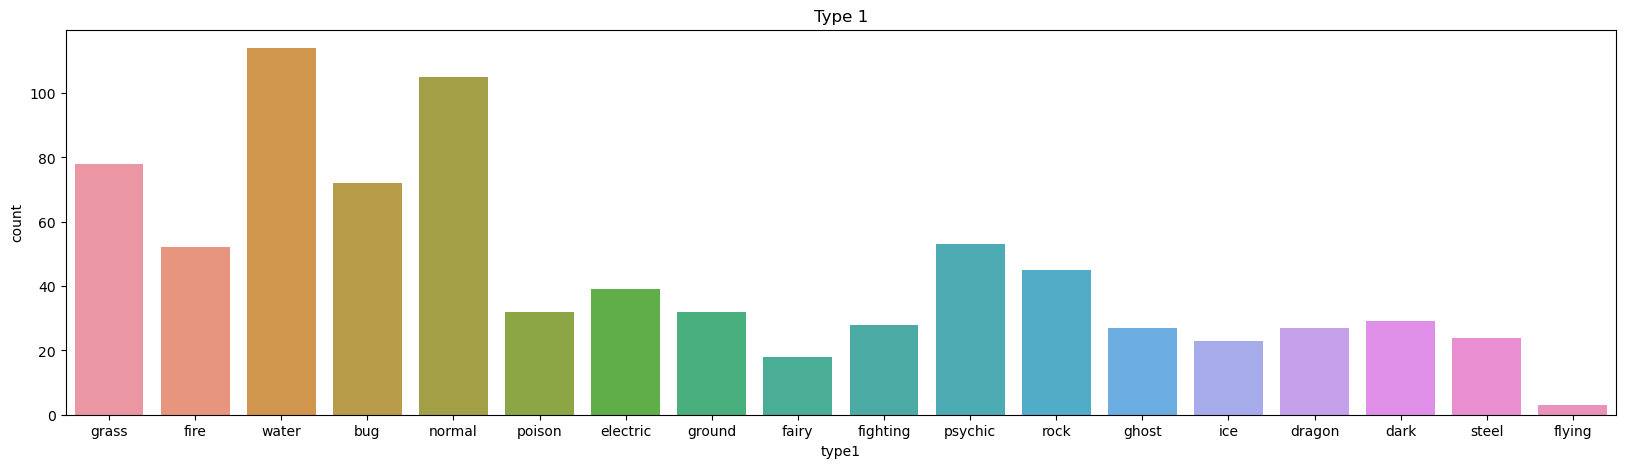

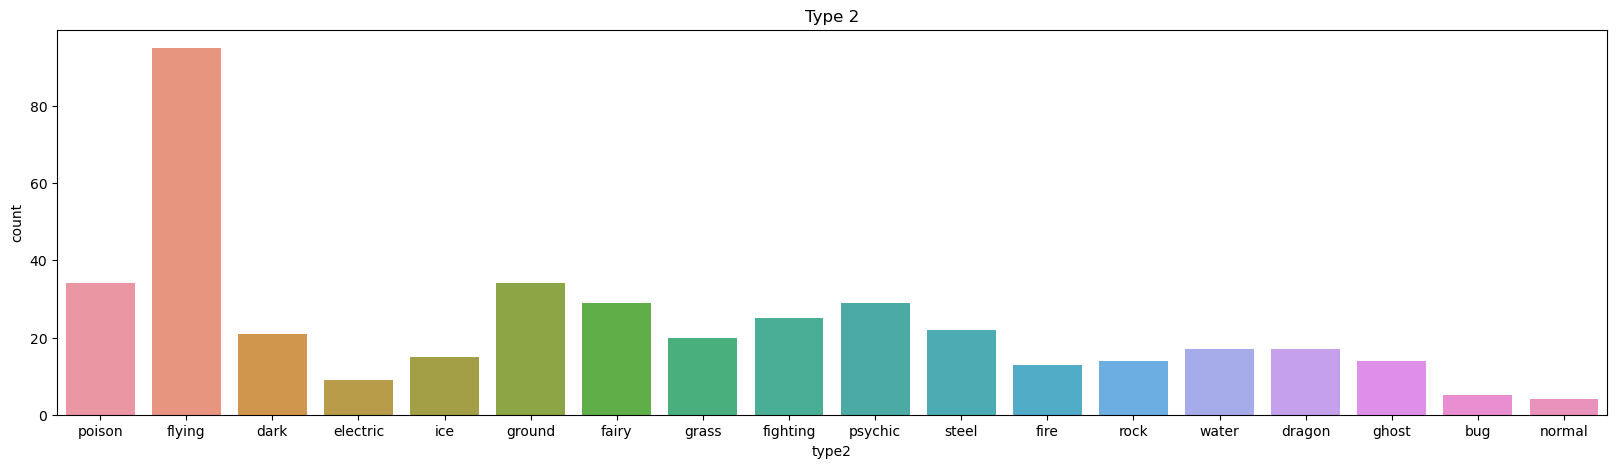

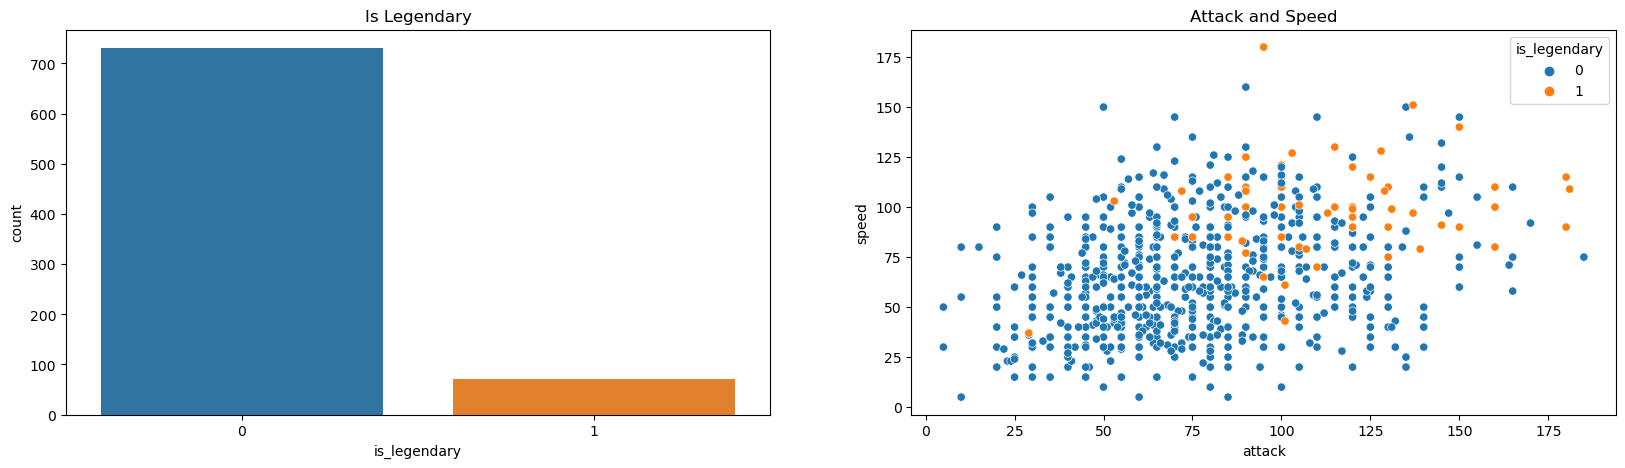

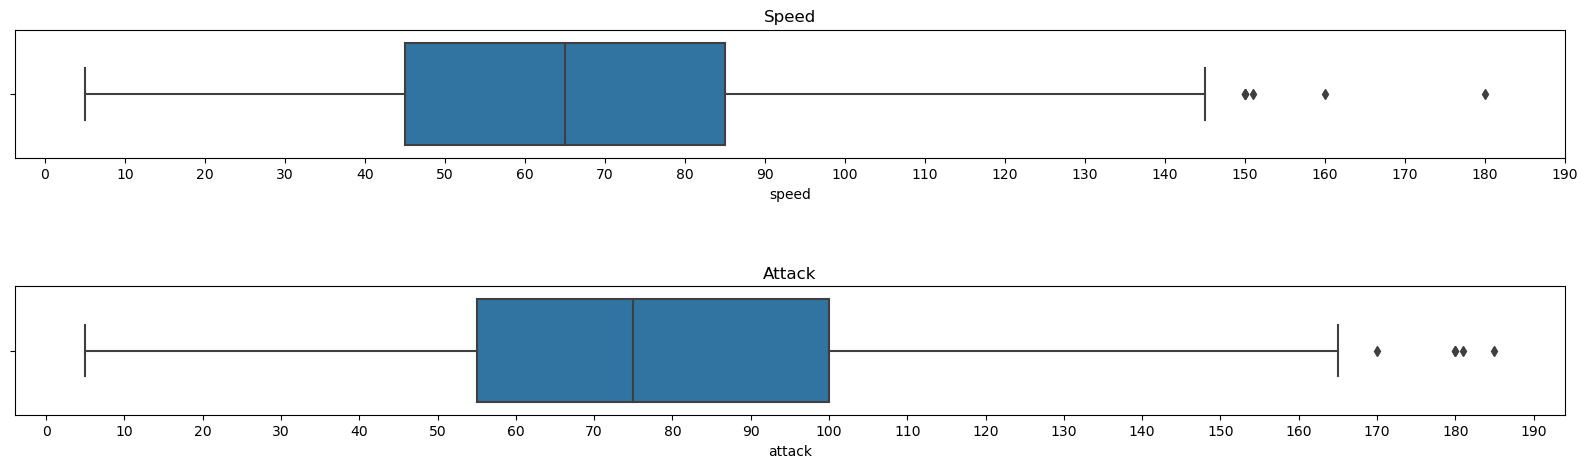

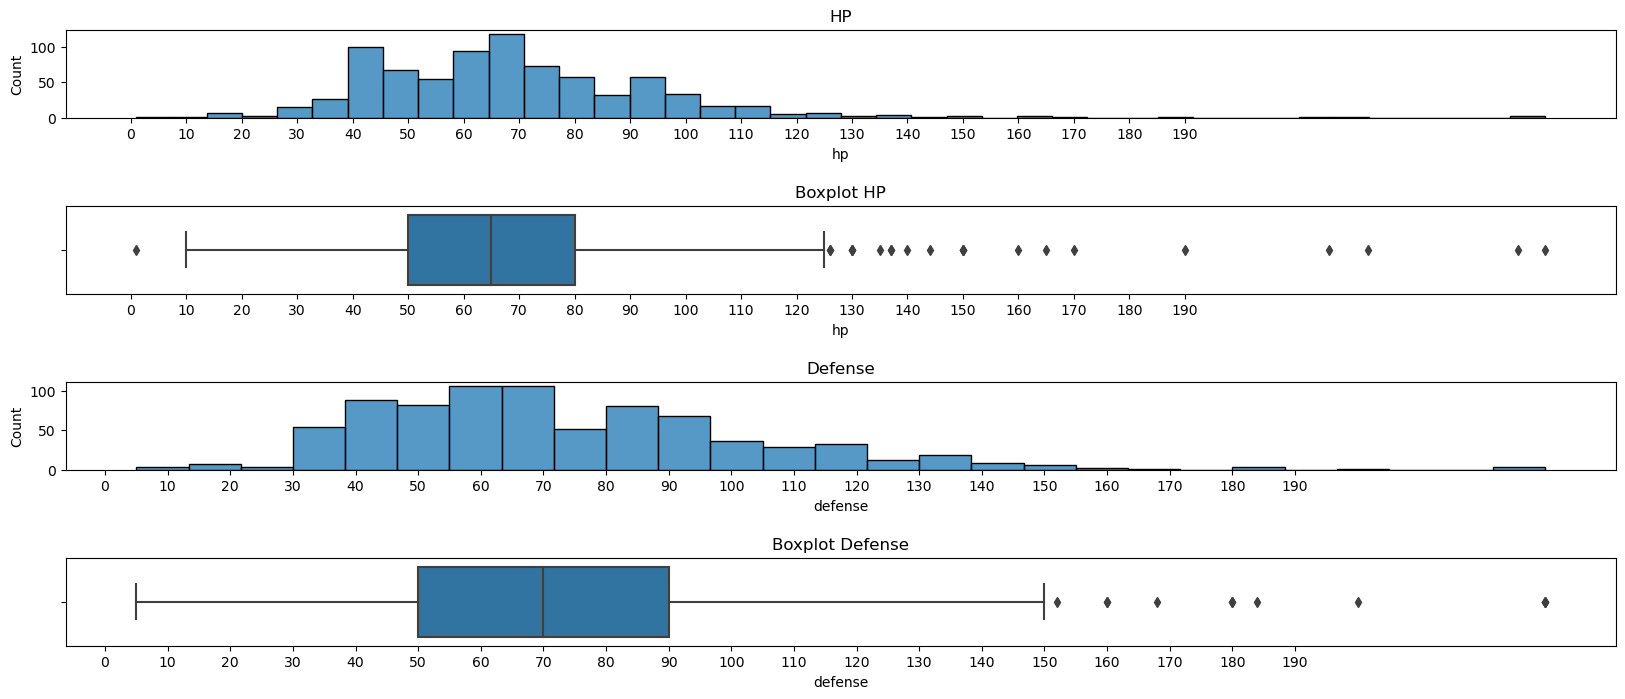

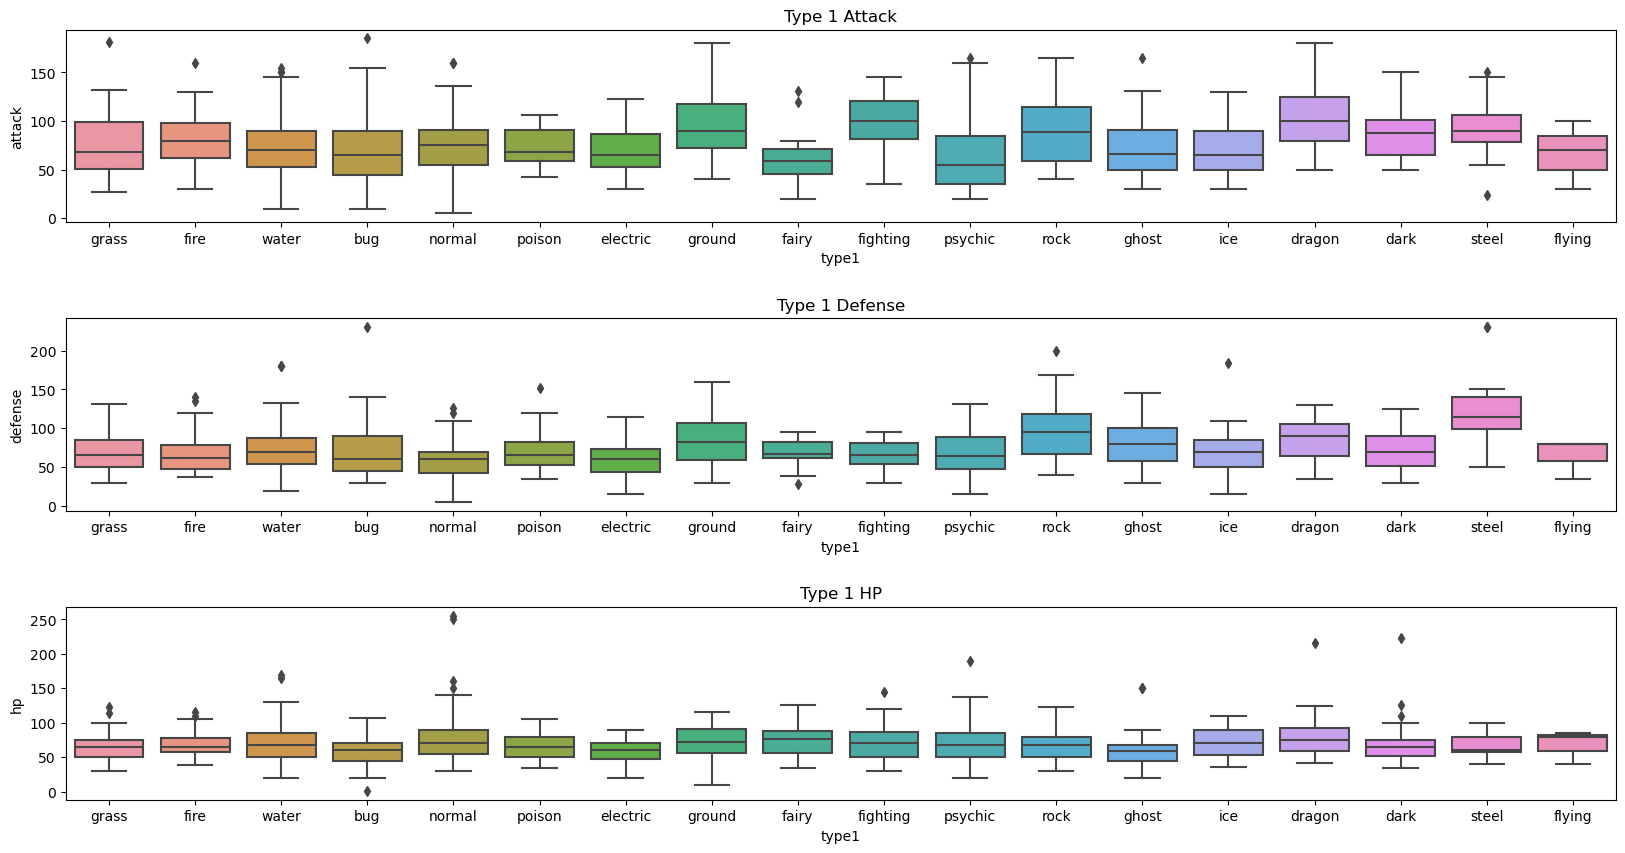

In [9]:
print("Countplot of classifcation")

plt.figure(figsize=(20,5))
sns.countplot(data = df, x = 'type1').set(title="Type 1")
plt.show()
plt.figure(figsize=(20,5))
sns.countplot(data = df, x = 'type2').set(title="Type 2")
plt.show()

fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.countplot(data = df, x = 'is_legendary',ax=axes[0]).set(title="Is Legendary")
sns.scatterplot(data = df, x= 'attack', y = 'speed', hue = 'is_legendary', ax = axes[1]).set(title="Attack and Speed")
plt.show()

fig, axes = plt.subplots(2, 1, figsize=(20,5))
#increase suplot height
fig.subplots_adjust(hspace=1)
sns.boxplot(data = df, x = 'speed', ax = axes[0]).set(title="Speed")
axes[0].set_xticks(ticks = range(0,200,10))
sns.boxplot(data = df, x = 'attack', ax = axes[1]).set(title="Attack")
axes[1].set_xticks(ticks = range(0,200,10))
plt.show()

#Histoghram of attack and speed
fig, axes = plt.subplots(4, 1, figsize=(20,8))
#increase suplot height
fig.subplots_adjust(hspace=1)
sns.histplot(data = df, x = 'hp', ax = axes[0]).set(title="HP")
axes[0].set_xticks(ticks = range(0,200,10))
sns.boxplot(data = df, x = 'hp', ax = axes[1]).set(title="Boxplot HP")
axes[1].set_xticks(ticks = range(0,200,10))
sns.histplot(data = df, x = 'defense', ax = axes[2]).set(title="Defense")
axes[2].set_xticks(ticks = range(0,200,10))
sns.boxplot(data = df, x = 'defense', ax = axes[3]).set(title="Boxplot Defense")
axes[3].set_xticks(ticks = range(0,200,10))
plt.show()

#Box plot of speed, defense, hp for each value in type 1 
fig, axes = plt.subplots(3, figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
#increase suplot height
sns.boxplot(data = df, x = 'type1', y = 'attack', ax = axes[0]).set(title="Type 1 Attack")
sns.boxplot(data = df, x = 'type1', y = 'defense', ax = axes[1]).set(title="Type 1 Defense")
sns.boxplot(data = df, x = 'type1', y = 'hp', ax = axes[2]).set(title="Type 1 HP")
plt.show()

### Indexing
plt.figure(figsize=(20,5))

- Select pokemon with attack > 100
- Select pokemon with speed < 100
- how many pokemon has sp_defense < 30
- how many legendary pokemon
- get pokemon that has type 1 = 'fire' and defense maximum ( get the row)
- get pokemon that has type 2 = 'Some value' and defense minimum ( get the row)
- what's the most common type of legendary pokemon (plot the bar plot if you want)
- what's the most powerful pokemon from the first 3 generations (total = attack + speed + defense) that has type 1 = 'Water' (or some values)
- what's the most powerful 'Dragon' (type1 or type 2) from the last 2 generations
- select pokemons that has speed slower than 5th percentile
- select pokemons that has speed faster than 95th percentile

In [15]:
print("Pokemon with attack > 100")
a = df.loc[df['attack'] > 100]
print(a.shape)
a.head()


Pokemon with attack > 100
(169, 12)


,abilities,attack,base_total,classfication,defense,hp,name,speed,type1,type2,generation,is_legendary
5,"['Blaze', 'Solar Power']",104,634,Flame Pokémon,78,78,Charizard,100,fire,flying,1,0
8,"['Torrent', 'Rain Dish']",103,630,Shellfish Pokémon,120,79,Blastoise,78,water,NaN,1,0
14,"['Swarm', 'Sniper']",150,495,Poison Bee Pokémon,40,65,Beedrill,145,bug,poison,1,0
33,"['Poison Point', 'Rivalry', 'Sheer Force']",102,505,Drill Pokémon,77,81,Nidoking,85,poison,ground,1,0
56,"['Vital Spirit', 'Anger Point', 'Defiant']",105,455,Pig Monkey Pokémon,60,65,Primeape,95,fighting,NaN,1,0


In [16]:
print("Pokemon with speed < 100")
b = df.loc[df['speed'] < 100]
print(b.shape)
b.head()

Pokemon with speed < 100
(679, 12)


,abilities,attack,base_total,classfication,defense,hp,name,speed,type1,type2,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",49,318,Seed Pokémon,49,45,Bulbasaur,45,grass,poison,1,0
1,"['Overgrow', 'Chlorophyll']",62,405,Seed Pokémon,63,60,Ivysaur,60,grass,poison,1,0
2,"['Overgrow', 'Chlorophyll']",100,625,Seed Pokémon,123,80,Venusaur,80,grass,poison,1,0
3,"['Blaze', 'Solar Power']",52,309,Lizard Pokémon,43,39,Charmander,65,fire,NaN,1,0
4,"['Blaze', 'Solar Power']",64,405,Flame Pokémon,58,58,Charmeleon,80,fire,NaN,1,0


In [28]:
print("How many pokemon with defense < 30")
c = df.loc[df['defense'] < 30]
print()
print("Count = ", len(c))
d = df.loc[df['is_legendary']]
print()
print('Legendary pokemon count = ', len(d))
print()
print('Pokemon type 1 with max defense')
max_defense_type_1_fire = df.loc[df['type1'] == 'fire']['defense'].max()
e = df.loc[(df['defense'] == max_defense_type_1_fire) & (df['type1'] == 'fire')]
e.head()

How many pokemon with defense < 30

Count =  13

Legendary pokemon count =  801

Pokemon type 1 with max defense


,abilities,attack,base_total,classfication,defense,hp,name,speed,type1,type2,generation,is_legendary
323,"['White Smoke', 'Drought', 'Shell Armor']",85,470,Coal Pokémon,140,70,Torkoal,20,fire,NaN,3,0


In [58]:
print("defense minimum type 2 of fire")
min_def_type2_fire = df.loc[df['type2'] == 'fire']['defense'].min()
print(min_def_type2_fire)
a1 = df.loc[(df['type2'] == 'fire') & (df['defense'] == min_def_type2_fire)]
a1.head()
print("most common type 1 of legendary")
b2 = df.loc[df['is_legendary'] == True]['type1'].value_counts().sort_values(ascending = False)
print(b2)





defense minimum type 2 of fire
30
most common type 1 of legendary
psychic     17
dragon       7
water        6
steel        6
electric     5
fire         5
rock         4
grass        4
normal       3
dark         3
bug          3
ice          2
ground       2
ghost        1
flying       1
fairy        1
Name: type1, dtype: int64


In [68]:
max_total = df['base_total'].max()
print(max_total)
a2 = df.loc[(df['generation'].isin({1,2,3})) &(df['base_total'] == max_total)]
a2.head()



780


,abilities,attack,base_total,classfication,defense,hp,name,speed,type1,type2,generation,is_legendary,total
149,"['Pressure', 'Unnerve']",150,780,Genetic Pokémon,70,106,Mewtwo,140,psychic,NaN,1,1,326
383,['Air Lock'],180,780,Sky High Pokémon,100,105,Rayquaza,115,dragon,flying,3,1,385


In [73]:
print('''what's the most powerful pokemon (based on base total ) from the first 3 generations that has type 1 == fire''')
max_base_total = df.loc[df['type1'] == 'fire']['base_total'].max()
print(max_base_total)
b2 = df.loc[(df['generation'].isin({1,2,3})) & (df['base_total'] == max_base_total) & (df['type1'] == 'fire')]
b2.head()

what's the most powerful pokemon (based on base total ) from the first 3 generations that has type 1 == fire
680


,abilities,attack,base_total,classfication,defense,hp,name,speed,type1,type2,generation,is_legendary,total
249,"['Pressure', 'Regenerator']",130,680,Rainbow Pokémon,90,106,Ho-Oh,90,fire,flying,2,1,326


In [79]:
print('''what's the most powerful 'Dragon' (type1 or type 2) from the last 2 generations''')
max_dragon_total = df.loc[(df['generation'].isin({6,7})) & (df['type1'] == 'dragon') | (df['type2'] == 'dragon')]['base_total'].max()
print(max_dragon_total)
c2 = df.loc[(df['generation'].isin({6,7})) & (df['base_total'] == max_dragon_total) & ((df['type1'] == 'dragon') | (df['type2'] == 'dragon'))]
c2.head()

what's the most powerful 'Dragon' (type1 or type 2) from the last 2 generations
708


,abilities,attack,base_total,classfication,defense,hp,name,speed,type1,type2,generation,is_legendary,total
717,"['Aura Break', 'Power Construct']",100,708,Order Pokémon,121,216,Zygarde,85,dragon,ground,6,1,437


In [85]:
#Get percentile of 'speed'
fifth_p = df['speed'].quantile(0.05)
print(fifth_p)

a3 = df.loc[df['speed'] < fifth_p]
print(a3.shape)
a3.head()



25.0
(38, 13)


,abilities,attack,base_total,classfication,defense,hp,name,speed,type1,type2,generation,is_legendary,total
38,"['Cute Charm', 'Competitive', 'Friend Guard']",45,270,Balloon Pokémon,20,115,Jigglypuff,20,normal,fairy,1,0,180
73,"['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P...",80,300,Rock Pokémon,100,40,Geodude,20,rock,ground,1,0,220
78,"['Oblivious', 'Own Tempo', 'Regenerator']",65,315,Dopey Pokémon,65,90,Slowpoke,15,water,psychic,1,0,220
160,"['Run Away', 'Keen Eye', 'Frisk']",46,215,Scout Pokémon,34,35,Sentret,20,normal,NaN,2,0,115
172,"['Cute Charm', 'Magic Guard', 'Friend Guard']",25,218,Star Shape Pokémon,28,50,Cleffa,15,fairy,NaN,2,0,103


In [87]:
ninep = df['speed'].quantile(0.95)
b3 = df.loc[df['speed'] > ninep]
print(b3.shape)
b3.head()



(34, 13)


,abilities,attack,base_total,classfication,defense,hp,name,speed,type1,type2,generation,is_legendary,total
14,"['Swarm', 'Sniper']",150,495,Poison Bee Pokémon,40,65,Beedrill,145,bug,poison,1,0,255
17,"['Keen Eye', 'Tangled Feet', 'Big Pecks']",80,579,Bird Pokémon,80,83,Pidgeot,121,normal,flying,1,0,243
64,"['Synchronize', 'Inner Focus', 'Magic Guard']",50,600,Psi Pokémon,65,55,Alakazam,150,psychic,NaN,1,0,170
93,['Cursed Body'],65,600,Shadow Pokémon,80,60,Gengar,130,ghost,poison,1,0,205
100,"['Soundproof', 'Static', 'Aftermath']",50,490,Ball Pokémon,70,60,Electrode,150,electric,NaN,1,0,180


### Target correlation

target: is_legendary

Note: I want to know what features correlated to target. I want to find the best model to predict this target

